In [1]:
# 샘플 데이터 만드는 코드
import random
import sys
from tensorflow import keras
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import string
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

def generate_time_series():
    string_pool = ["A", "B", "C", "D", "E", "F"]
    char_to_index = dict((char, index) for index, char in enumerate(string_pool)) # 글자에 고유한 정수 인덱스 부여
    index_to_char = {}

    for key, value in char_to_index.items():
        index_to_char[value] = key
    
    array = [[0 for col in range(30)] for row in range(2000)]
    for i in range(2000):
        for j in range(30):
            a = random.choice(string_pool)
            num = char_to_index[a]
            array[i][j] = num
        array[i].sort()

    for i in range(1000):
        array[i].reverse()
    arr = np.array(array)
    np.random.shuffle(arr)
    arr = np.array(arr)
    return arr
    
series = generate_time_series()

# 앞의 15개 좌표를 이용해 뒤의 15개 좌표 예측하기 위한 데이터셋
X_train, Y_train = series[:1000, :15], series[:1000, -15:]
X_train = keras.utils.to_categorical(X_train, 6)
Y_train = keras.utils.to_categorical(Y_train, 6)
X_train = np.array(X_train)
X_valid, Y_valid = series[1000:1500, :15], series[1000:1500, -15:]
X_valid = keras.utils.to_categorical(X_valid, 6) # 원 핫 인코딩
Y_valid = keras.utils.to_categorical(Y_valid, 6) # 원 핫 인코딩

# 테스트 데이터셋
test = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5] 
test = np.array(test)
X_test = np.split(test, 2)[0]
Y_test = np.split(test, 2)[1]
X_test = keras.utils.to_categorical(X_test, 6) # 원 핫 인코딩
X_test = np.array(X_test)

Epoch 1/100
32/32 [==============================] - 4s 78ms/step - loss: 1.1173 - accuracy: 0.5323 - val_loss: 0.8453 - val_accuracy: 0.6844
Epoch 2/100
32/32 [==============================] - 2s 63ms/step - loss: 0.8297 - accuracy: 0.6808 - val_loss: 0.8054 - val_accuracy: 0.6712
Epoch 3/100
32/32 [==============================] - 2s 65ms/step - loss: 0.7900 - accuracy: 0.6782 - val_loss: 0.7701 - val_accuracy: 0.6788
Epoch 4/100
32/32 [==============================] - 2s 64ms/step - loss: 0.7619 - accuracy: 0.6831 - val_loss: 0.7387 - val_accuracy: 0.6887
Epoch 5/100
32/32 [==============================] - 2s 62ms/step - loss: 0.7413 - accuracy: 0.6804 - val_loss: 0.7180 - val_accuracy: 0.6927
Epoch 6/100
32/32 [==============================] - 2s 65ms/step - loss: 0.7270 - accuracy: 0.6863 - val_loss: 0.7387 - val_accuracy: 0.6848
Epoch 7/100
32/32 [==============================] - 2s 65ms/step - loss: 0.7163 - accuracy: 0.6863 - val_loss: 0.7154 - val_accuracy: 0.6868
Epoch 

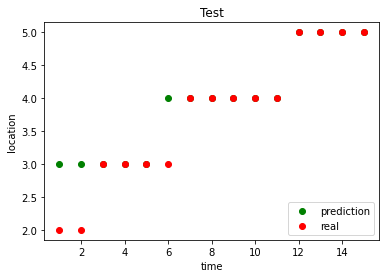

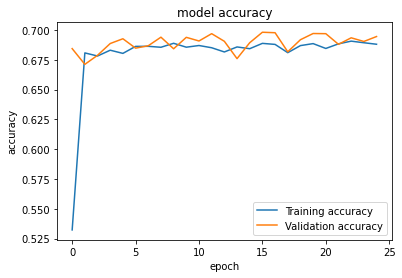

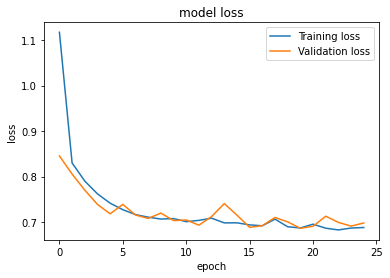

In [222]:
# LSTM 이용한 학습 및 예측 확인
import random
import sys
from tensorflow import keras
import numpy as np
import string
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed


# LSTM 모델 생성 및 학습
model = Sequential()
model.add(LSTM(256, input_shape=(15, 6), return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(6, activation='softmax')))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_valid, Y_valid), callbacks=[early_stopping_cb])
model.evaluate(X_valid, Y_valid)
model.summary()

# 예측 결과와 실제 값 시각화
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
X_test = X_test.reshape(1,15,6)
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=2)
print(Y_pred)
plt.scatter(X, Y_pred, c='green')
plt.scatter(X, Y_test, c='red')
plt.title('Test')
plt.ylabel('location')
plt.xlabel('time')
plt.legend(['prediction', 'real'], loc='lower right')
plt.show()

# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

# loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

Epoch 1/100
32/32 [==============================] - 1s 18ms/step - loss: 0.8574 - accuracy: 0.6453 - val_loss: 0.7487 - val_accuracy: 0.6760
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 0.7529 - accuracy: 0.6657 - val_loss: 0.7298 - val_accuracy: 0.6799
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 0.7070 - accuracy: 0.6837 - val_loss: 0.6947 - val_accuracy: 0.6933
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 0.7051 - accuracy: 0.6811 - val_loss: 0.7065 - val_accuracy: 0.6849
Epoch 5/100
32/32 [==============================] - 0s 14ms/step - loss: 0.7041 - accuracy: 0.6793 - val_loss: 0.7009 - val_accuracy: 0.6896
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6912 - accuracy: 0.6873 - val_loss: 0.7195 - val_accuracy: 0.6840
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6979 - accuracy: 0.6811 - val_loss: 0.7015 - val_accuracy: 0.6899
Epoch 

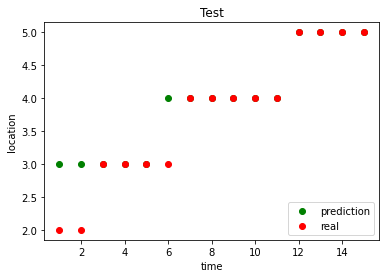

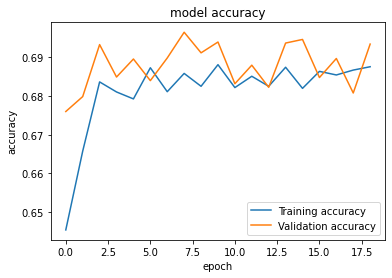

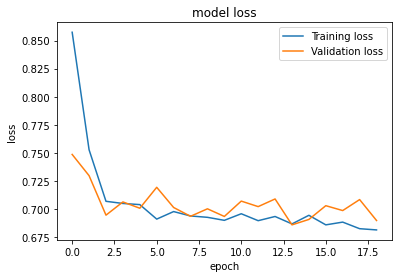

In [223]:
# SimpleRNN 이용한 학습 및 예측 확인
import random
import sys
from tensorflow import keras
import numpy as np
import string
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed, SimpleRNN

# SimpleRNN 모델 생성 및 학습
model = Sequential()
model.add(SimpleRNN(256, input_shape=(15, 6), return_sequences=True))
model.add(SimpleRNN(256, return_sequences=True))
model.add(TimeDistributed(Dense(6, activation='softmax')))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_valid, Y_valid), callbacks=[early_stopping_cb])
model.evaluate(X_valid, Y_valid)
model.summary()

# 예측 결과와 실제 값 시각화
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
X_test = X_test.reshape(1,15,6)
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=2)
print(Y_pred)
plt.scatter(X, Y_pred, c='green')
plt.scatter(X, Y_test, c='red')
plt.title('Test')
plt.ylabel('location')
plt.xlabel('time')
plt.legend(['prediction', 'real'], loc='lower right')
plt.show()

# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

# loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()